In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("automobile/imports-85.data", header=None)

In [46]:
df.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [47]:
col_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body_style", "drive_wheels", "engine_location", 
             "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders","engine-size", "fuel-system", "bore", "stroke", 
             "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = col_names

In [48]:
drive_wheels_count = df.drive_wheels.value_counts().to_frame()
drive_wheels_count.rename(columns={"drive_wheels": "count"}, inplace=True)
drive_wheels_count

,count
drive_wheels,
fwd,120
rwd,76
4wd,9


In [49]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Descriptive Statistics 
Drive_wheels and Price 

In [50]:
# Install library: pip install seaborn
import seaborn as sns


In [51]:
mean = df[df["price"] != '?']['price'].astype('int64').mean()
df["price"] = df["price"].replace('?', mean)
df["price"] = df["price"].astype('int64')


<Axes: xlabel='drive_wheels', ylabel='price'>

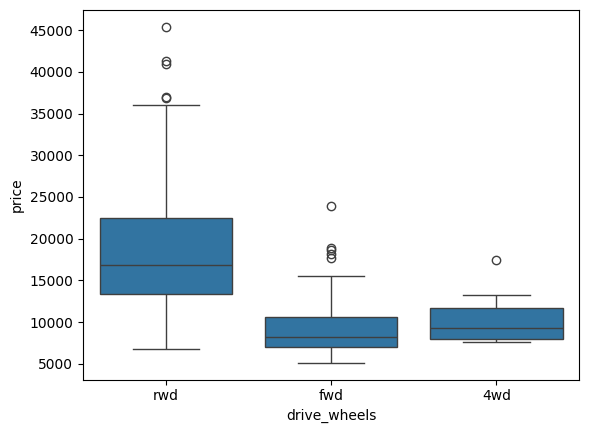

In [52]:

sns.boxplot(x="drive_wheels", y="price", data=df)


In [53]:
# Install library: pip install matblotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

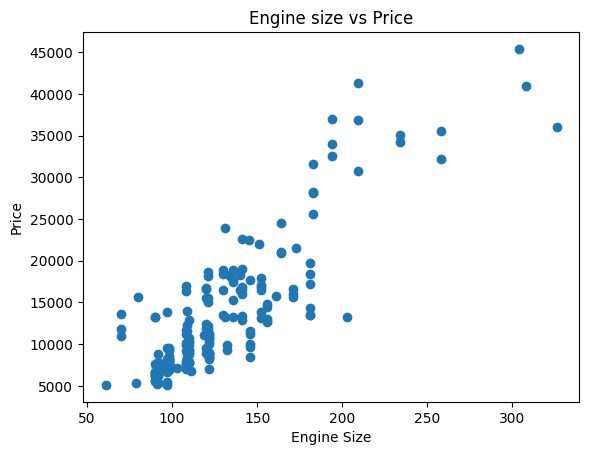

In [54]:
x = df["engine-size"]
y = df["price"]
plt.scatter(x, y)
plt.title("Engine size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

In [55]:
df_test = df[["drive_wheels", "body_style", "price"]]
df_group = df_test.groupby(["drive_wheels", "body_style"], as_index=False).mean()
df_group

,drive_wheels,body_style,price
0,4wd,hatchback,10405.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.929825
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [56]:
df_pivot = df_group.pivot(index='drive_wheels', columns='body_style')

In [57]:
df_pivot

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  NaN           NaN  10405.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.929825   
rwd              23949.6  24202.714286  14278.263158  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

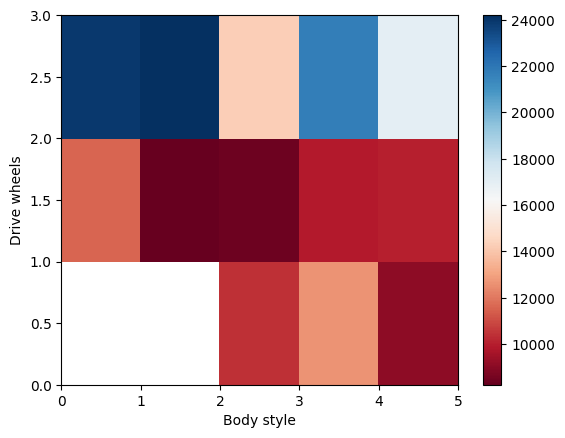

In [63]:
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.xlabel("Body style")
plt.ylabel("Drive wheels")
plt.show()

In [59]:
df.columns


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<Axes: title={'center': 'Relation of engine-type and price'}, xlabel='engine-type', ylabel='price'>

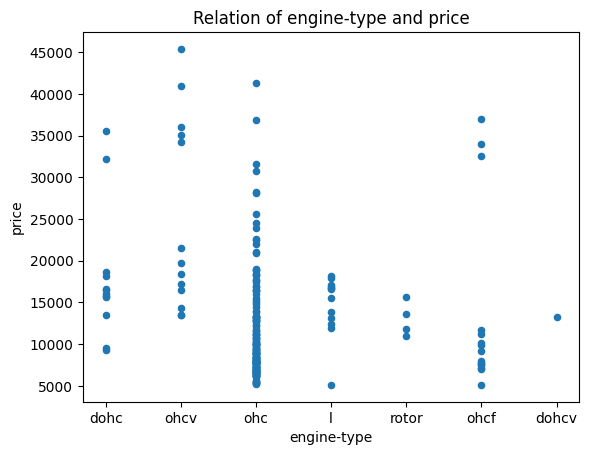

In [60]:
df.plot(kind="scatter", x='engine-type', y = 'price' , title="Relation of engine-type and price")


In [61]:
df_fpt = pd.read_csv("FPT Historical Data_3.csv")

df_fpt.info

<bound method DataFrame.info of            Date      Price       Open       High        Low    Vol. Change %
0    06/17/2024  128,800.0  131,000.0  131,400.0  128,500.0   4.87M   -1.68%
1    06/14/2024  131,000.0  130,100.0  132,600.0  129,000.0   6.41M    0.77%
2    06/13/2024  130,000.0  133,700.0  133,800.0  130,000.0   8.14M   -1.52%
3    06/12/2024  132,000.0  127,900.0  132,700.0  127,800.0  11.22M   -9.90%
4    06/11/2024  146,500.0  144,300.0  146,500.0  143,100.0   6.33M    1.74%
..          ...        ...        ...        ...        ...     ...      ...
345  01/30/2023   71,222.0   71,648.0   71,818.0   71,222.0   1.02M   -0.36%
346  01/27/2023   71,477.0   71,562.0   72,754.0   71,477.0   1.31M    0.12%
347  01/19/2023   71,392.0   70,626.0   71,648.0   70,541.0   1.53M    0.60%
348  01/18/2023   70,967.0   69,861.0   70,967.0   69,605.0   1.10M    1.71%
349  01/17/2023   69,776.0   69,095.0   69,776.0   68,925.0   1.12M    1.49%

[350 rows x 7 columns]>

In [62]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body_style,drive_wheels,engine_location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
